# Agrupamento Hierarquico

- https://smolski.github.io/livroavancado/analise-de-clusters.html#clusterizacao-aglomerativa

# Carregar e Escalonar a Base de Dados 

- Motores de carros

In [3]:
df = scale(mtcars)
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


## Calcular as distâncias 

- A função **dist** em R possibilita calcular a distâncias entre diferentes pontos de um conjunto de dados
- Os métodos (**method**) de cálculo das disntâncias podem ser "euclidean", "maximum", "manhattan", "canberra", "binary" ou "minkowski".

In [17]:
distancias = dist(df, method="euclidean")
head(distancias)

[1] 0.4075899 3.2430644 4.4013651 3.8803542 4.8437395 4.1895788

# Análise de cluster hierárquica

- Análise de cluster hierárquica em um conjunto de dissimilaridades e métodos para analisá-lo.

parâmetros

- **d** - Uma estrutura de dissimilaridade produzida por dist.
- **method** - O método de aglomeração a ser utilizado. Deve ser (uma abreviatura inequívoca de) "ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) ou "centoid" (= UPGMC).
- **members** - NULL ou um vetor com tamanho de comprimento de d. 
- **x** - Um objeto do tipo produzido por hclust.
- **hang** - A fração da altura do gráfico pela qual os rótulos devem ficar abaixo do resto do gráfico. Um valor negativo fará com que os rótulos pendam de 0.
- **check** - Lógica indicando se o objeto x deve ser verificado para validade. Essa verificação não é necessária quando x é conhecido como válido, como quando é o resultado direto de hclust (). O padrão é check = TRUE, pois entradas inválidas podem travar R devido à violação de memória no código de plotagem C interno.
- **labels** - Um vetor de caracteres de rótulos para as folhas da árvore. Por padrão, os nomes ou números das linhas dos dados originais são usados. Se rótulos = FALSO, nenhum rótulo é plotado.
- Podemos passar parâmetros gráficos para a função

Atributos

- **merge** - Uma matriz. A linha i de fusão descreve a fusão de clusters na etapa i do agrupamento. Se um elemento j na linha for negativo, a observação j foi mesclada neste estágio. Se j for positivo, então a fusão foi com o cluster formado no estágio (anterior) j do algoritmo. Assim, entradas negativas na mesclagem indicam aglomerações de singletons e entradas positivas indicam aglomerações de não singletons.
- **altura** - Um conjunto de \ (n-1 \) valores reais (não decrescente para árvores ultramétricas). A altura do agrupamento: isto é, o valor do critério associado ao método de agrupamento para a aglomeração particular.
 - **order** - Um vetor que dá a permutação das observações originais adequadas para plotagem, no sentido de que um gráfico de cluster usando esta ordenação e mesclagem de matriz não terá cruzamentos dos ramos.
- **labels** - Os rótulos para cada um dos objetos sendo agrupados.
- **call** - A chamada que produziu o resultado.
- **method** - O método de cluster que foi usado.
- **dist.method** - A distância que foi usada para criar d (retornada apenas se o objeto de distância tiver um atributo "método"). 

Retorno

- Um objeto da classe hclust que descreve a árvore produzida pelo processo de agrupamento

In [31]:
hc = hclust(
    d = distancias,
    method="ward.D"
)

# Dendograma

- https://rpubs.com/fmachry/dendogramas_with_base_R
- Ao passar o árvore hclust a função plor gera automáticamente o dendograma
- podemos usar a função **abline** para desenhar no gráfico um corte com o número de clusters a serem usados

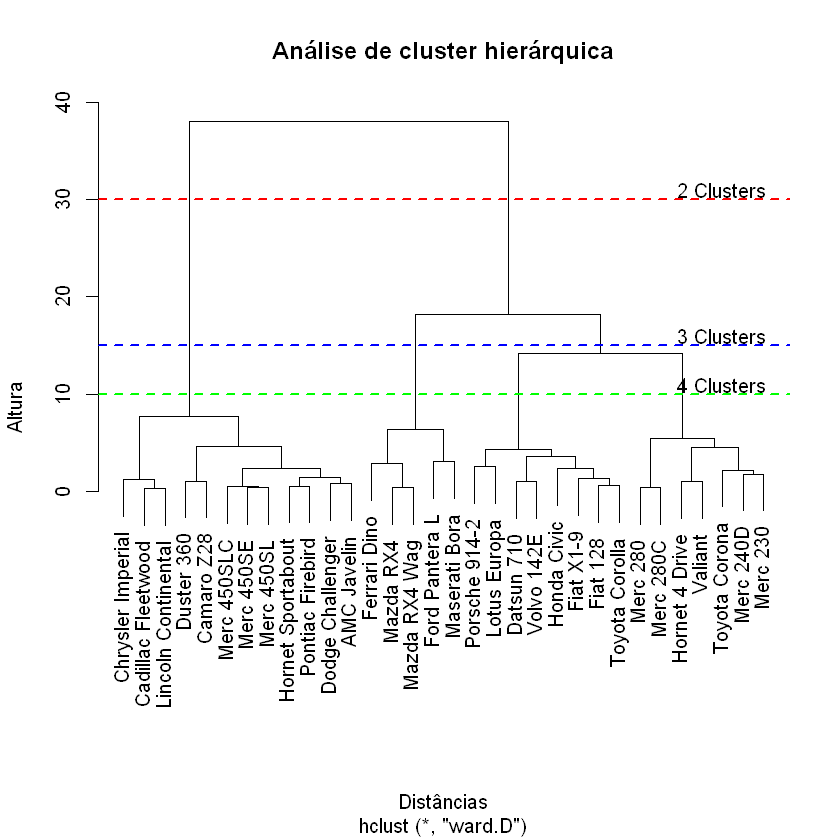

In [45]:
plot(
    hc,
    main = 'Análise de cluster hierárquica',
    ylab = 'Altura',
    xlab = 'Distâncias'
)

abline(h = 30, lty = 2, lwd = 2, col = "Red")
text(y = 31, x = 30, labels = "2 Clusters")

abline(h = 15, lty = 2, lwd = 2, col = "Blue")
text(y = 16, x = 30, labels = "3 Clusters")

abline(h = 10, lty = 2, lwd = 2, col = "Green")
text(y = 11, x = 30, labels = "4 Clusters")

# Gerar os Grupos

- De modo geral, um bom ponto de decisão da clusterização final é onde os valores de distância mudam consideravelmente, ou seja, a distância vertical mais alta que não cruza com os clusters (sem linhas horizontais). 
- O métoco **cutree** irá cortar o a árvore do hclust, retornando os grupos das classes

In [48]:
previsoes = cutree(hc, 4)
head(previsoes)

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
                1                 1                 2                 3 
Hornet Sportabout           Valiant 
                4                 3

# Visulaizar as previsões

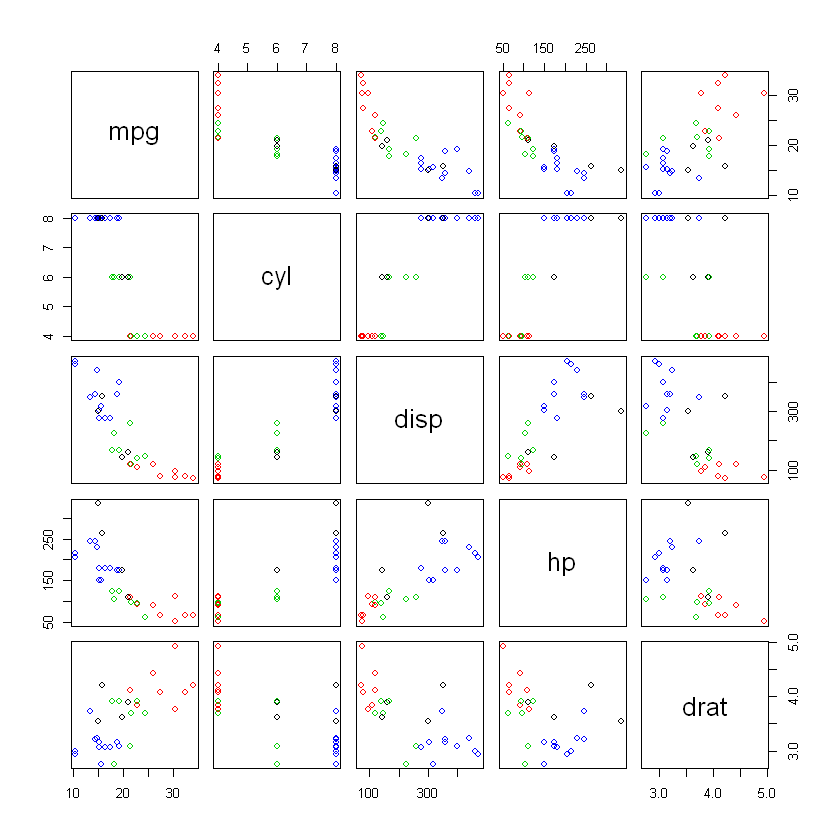

In [56]:
plot(mtcars[1:5], col = previsoes)

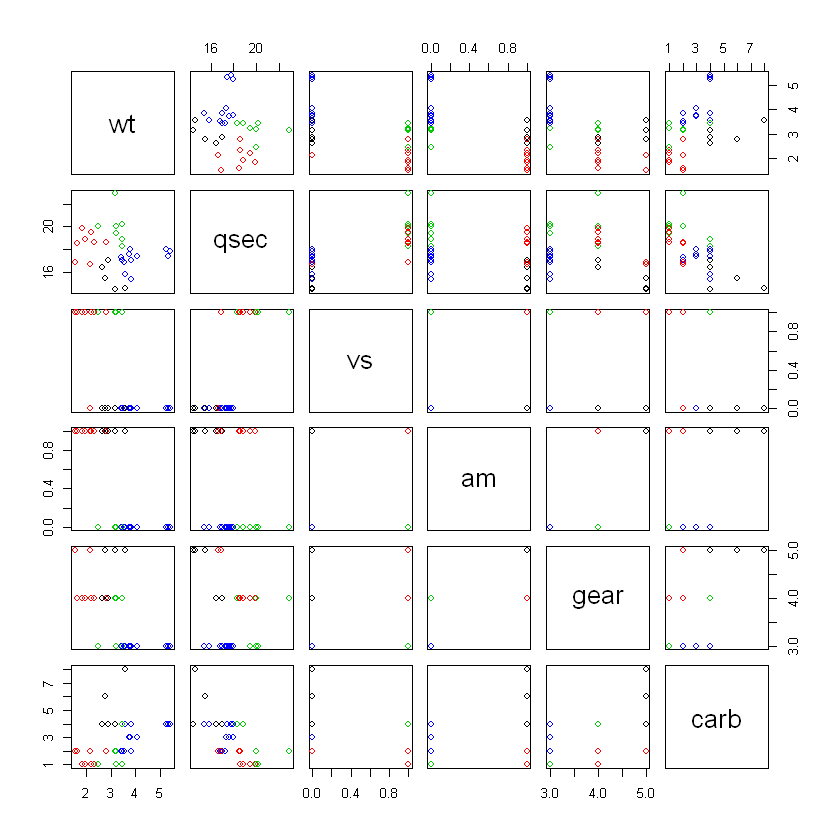

In [57]:
plot(mtcars[6:11], col = previsoes)